In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fdconverge-order12)

Let's observe the convergence of the formulas in {numref}`Example {number} <example-fd-converge-FD11>` and {numref}`Example {number} <example-fd-converge-FD12>`, applied to the function $\sin(e^{x+1})$ at $x=0$.

In [2]:
f = x -> sin(exp(x + 1))
exact_value = exp(1) * cos(exp(1))

-2.478349732955235

We'll compute the formulas in parallel for a sequence of $h$ values.

In [3]:
h = [5 / 10^n for n in 1:6]
FD = zeros(length(h), 2)
for (k, h) in enumerate(h)
    FD[k, 1] = (f(h) - f(0)) / h
    FD[k, 2] = (f(h) - f(-h)) / 2h
end
@pt :header=["h", "FD1", "FD2"] [h FD]

h,FD1,FD2
0.5,-2.76858,-1.97047
0.05,-2.6128,-2.47552
0.005,-2.49211,-2.47832
0.0005,-2.47973,-2.47835
5.0e-5,-2.47849,-2.47835
5.0e-6,-2.47836,-2.47835


All that's easy to see from this table is that FD2 appears to converge to the same result as FD1, but more rapidly. A table of errors is more informative.

In [4]:
error_FD = @. exact_value - FD
@pt :header=["h", "error in FD1", "error in FD2"] [h error_FD]

h,error in FD1,error in FD2
0.5,0.290226,-0.507878
0.05,0.134446,-0.00282948
0.005,0.0137555,-2.80378e-5
0.0005,0.00137813,-2.80353e-7
5.0e-5,0.000137838,-2.80297e-9
5.0e-6,1.37841e-5,1.53291e-11


In each row, $h$ is decreased by a factor of 10, so that the error is reduced by a factor of 10 in the first-order method and 100 in the second-order method.

A graphical comparison can be useful as well. On a log-log scale, the error should (as $h\to 0$) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots to show $h$ _decreasing_ from left to right, which negates the slopes.

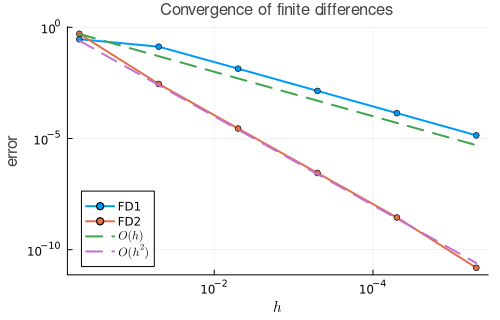

In [5]:
plot(h, abs.(error_FD); 
    m=:o,  label=["FD1" "FD2"], leg=:bottomleft,
    xflip=true,  xaxis=(:log10, L"h"),  yaxis=(:log10, "error"),
    title="Convergence of finite differences")

# Add lines for perfect 1st and 2nd order.
plot!(h, [h h .^ 2], l=:dash, label=[L"O(h)" L"O(h^2)"])